In [106]:
import pandas as pd
import numpy as np
import sys
import math
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm

In [107]:
# from IPython.display import Image, display
# if 'google.colab' in sys.modules:
#     from google.colab import drive
#     drive.mount('/content/drive')

In [108]:
# %cd '/content/drive/MyDrive/Inteligencia Artificial y Aprendizaje Maquinal/IA - Clases de Práctica/ContenidosPorTemas'

# Clasificador de Bayes

A diferencia de los clasificadores vistos hasta ahora, el clasificador de Bayes es de **tipo estadístico**.

Podemos definir un clasificador estadístico como un conjunto de funciones discriminantes $g_i$. El un número de funciones $g_i$ es igual al número de clases $c$ presentes en los datos.

Cada una de estas funciones $g_i$ va a tomar como entrada un patrón y va a devolver como salida un número real que será el máximo valor entre las salidas de cada función discriminante. Este número representa la probabilidad de pertenencia del patrón a una clase.

In [109]:
# display(Image(filename='./2_imagenes/funciones discriminantes.png', width=600))

El clasificador de Bayes utiliza como función discriminante, las **probabilidades a posteriori**.
A continuación vamos a repasar algunos conceptos para entender esta función discriminante.

### **Probabilidad a priori $P(w_i)$**: “Probabilidad de observar la etiqueta sin saber cual es el valor de la muestra”

se calcula como la proporción de muestras de $w_i$ respecto al total

- $0 \leq P(w_i) \leq 1, \text{ para }i=1,…,c$
- $\sum\limits_{1=1}^{c}P(w_1)=1$

***Ej. Cuál es la probabilidad de encontrar individuos anémicos en una población de individuos anémicos + sanos***

### **Densidad condicional $P(x|w_i)$ (likelihood)**: “Probabilidad de observar una muestra x sabiendo de qué clase la estoy sacando (la etiqueta)”


***Ej. Tengo 2 grupos etiquetados con sanos y anémicos, cuál es la probabilidad de sacar un conteo de glóbulos rojos 2.000.000, conociendo la clase a la que pertenece la muestra.***

### **Probabilidad conjunta $P(x,w_i)$**: “Probabilidad de observar la muestra x con la etiqueta $w_i$”

$$
P(x,w_i) = P(w_i)P(x|w_i)
$$

***Ej. Ahora tengo todas las muestras de los 2 grupos mezcladas, cuál es la probabilidad de sacar un conteo de glóbulos rojos de 2.000.000 y que sea un individuo sano***

### **Probabilidad incondicional $P(x)$ o Marginal** : “Probabilidad de observar la muestra x sin saber cuál es su etiqueta”

Suma de las probabilidades conjuntas para cada clase

$$
p(x) = \sum\limits_{j=1}^{c}P(x,w_j) = \sum\limits_{j=1}^{c}P(w_j) P(x|w_j)
$$
***Ej. cuál es la probabilidad de sacar un conteo de glóbulos rojos de 2.000.000 sin importar la clase***

### **Probabilidad a posteriori $P(w_i|x)$**: “Probabilidad de observar una etiqueta $w_i$  conociendo el valor de la muestra x”

Se obtiene mediante la regla de Bayes:

$$
P(w_i|x) = \frac{P(x|w_i)P(w_i)}{P(x)} = \frac{P(x|w_i)P(w_i)}{\sum\limits_{j=1}^{c}P(x|w_j)P(w_j)}
$$

# Clasificador Bayes

Es un clasificador que utiliza las **probabilidades a posteriori** como funciones discriminantes

La salida del clasificador será la clase que maximiza la expresión:

$$g_i(x) = P(w_i|x) = \frac{P(x|w_i)P(w_i)}{P(x)}$$

## Ejemplo de Aplicación: OCR de dígitos manuscritos 0 y 1

Vamos a ver un ejemplo simple de la aplicación de un clasificador de Bayes para el reconocimiento óptico de caracteres (OCR) de 2 dígitos manuscritos 0 y 1.

A continuación tenemos las imágenes binarizadas de ambos dígitos.

In [110]:
# # Figura 1
# display(Image(filename='./2_imagenes/digitos_0_1.png', width=800))

Estos dígitos inicialmente están guardados en vectores de dimensión (1,784) que conforman imágenes de 28x28 píxeles con intensidades entre 0 y 255. A los cuales se les aplicó un umbral de 127 para binarizarlas.

Posteriormente, para simplificar la tarea de clasificación, se transforman los datos a una única dimensión. Para esto, se mide sobre cada dígito el **brillo global** sumando el número de píxeles en blanco que posee la imagen.

Esta medida para cada dígito permitirá separar las clases de forma simple como se puede ver en los siguientes histogramas del brillo global para cada dígito:

In [111]:
# # Figura 2
# display(Image(filename='./2_imagenes/brillo_global_hist.png', width=800))

De los histogramas anteriores, es notable la diferencia en los valores del brillo global de estos dígitos.

Como información *a priori* para este problema, conocemos que el número de dígitos para cada clase es el mismo, por lo tanto se cumple que las **probabilidades a priori** son:
$$p(0) = p(1) = 0.5$$

Para las **probabilidades condicionales** se puede utilizar una *función de densidad de probabilidad* que se aproxime las distribuciones de los datos de estos histogramas.

Como podemos ver, ambas distribuciones pueden aproximarse mediante distribuciones normales o gaussianas.

A continuación, se muestran las densidades de los histogramas ( $frecuencia/ (n_i * bin\_width)$ ) junto con las funciones de densidad de probabilidad gaussianas.

In [112]:
# #Figura 3
# display(Image(filename='./2_imagenes/fdp.png', width=900))

A la izquierda podemos observar las probabilidades condicionales y a la derecha las probabilidades conjuntas y la probabilidad marginal resultante

In [113]:
# #Figura 4
# display(Image(filename='./2_imagenes/prob_conjunta_marginal.png', width=1500))

Luego, con las probabilidades conjuntas por clase y la probabilidad marginal podemos obtener la probabilidad a posteriori para cada clase

In [114]:
# #Figura 5
# display(Image(filename='./2_imagenes/posteriori.png', width=900))

## Actividades Prácticas

En el archivo `digitos_0_1.csv` de la carpeta `1_datos` se tienen dígitos manuscritos del 0 y 1. Reproduzca el análisis anterior para obtener un clasificador de Bayes que use como probabilidad condicional una distribución normal.


### 1. Carga y división de los datos

Cargue los datos y sepárelos en entrenamiento y prueba (20%). Use `random_state=0`. Separe predictores y etiquetas.

In [115]:
data = pd.read_csv('./1_datos/digitos_0_1.csv')

In [116]:
# Separamos las caracteristicas y las etiquetas
X = data.drop(columns=['target'])
y = data['target']

# Separamos los datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 2. Procesamiento de datos

Binarice los datos usando el umbral 127, de modo que las intensidades superiores al umbral sean iguales a 1 y las menores iguales a 0.

In [117]:
# Binarizamos los datos usando un umbral de 127
umbral = 127
X_train = (X_train > umbral).astype(int)
X_test = (X_test > umbral).astype(int)

In [118]:
# Mostramos los datos de entrenamiento
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
3381,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1386,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 3. Visualización de datos

Visualice los 15 primeros dígitos del conjunto de entrenamiento. Puede utilizar la función [imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) de matplotlib con el parámetro `cmap='binary'`

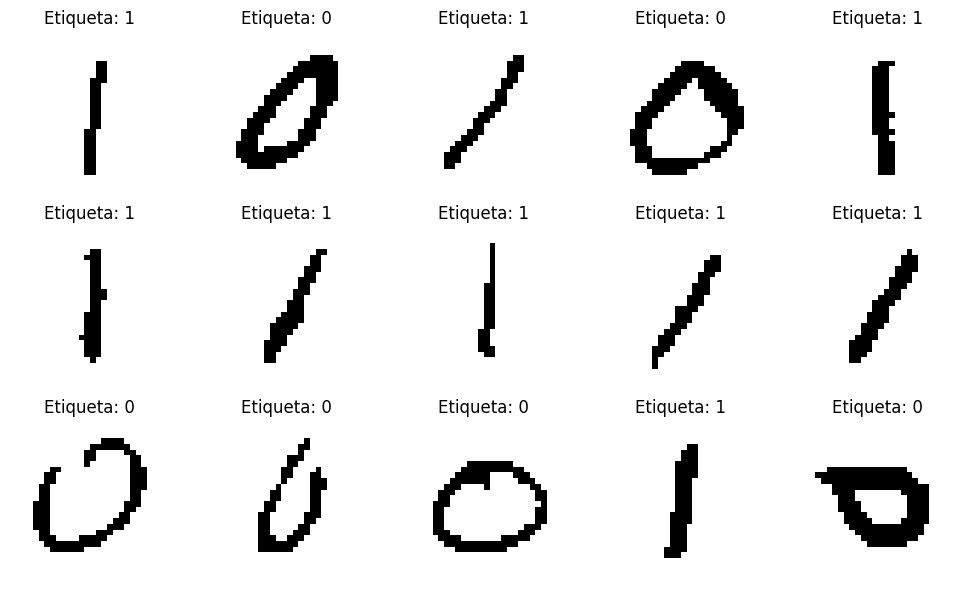

In [119]:
# Visualizamos los primeros 15 dígitos del conjunto de entrenamiento
fig, axes = plt.subplots(3, 5, figsize=(10, 6))
axes = axes.ravel()

for i in range(15):
    axes[i].imshow(X_train.iloc[i].values.reshape(28, 28), cmap='binary')
    axes[i].set_title(f"Etiqueta: {y_train.iloc[i]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

### 4. Cálculo de brillo global

Implemente una función para calcular el brillo global de una imagen que devuelva la suma de los píxeles blancos (iguales a 0). Aplique esta función a cada dígito del conjunto de datos (de entrenamiento y prueba) para transformarlo a un conjunto de una única característica. Puede utilizar la función [np.apply_along_axis](https://numpy.org/doc/stable/reference/generated/numpy.apply_along_axis.html)

Grafique la distribución del brillo global para cada clase (dígito 0 y dígito 1) usando histogramas, replicando la Figura2.

In [120]:
# Función para calcular el brillo global
def calcular_brillo_global(imagen):
    return np.sum(imagen == 0)

In [121]:
# Mostramos los datos
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
4320,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5689,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
472,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


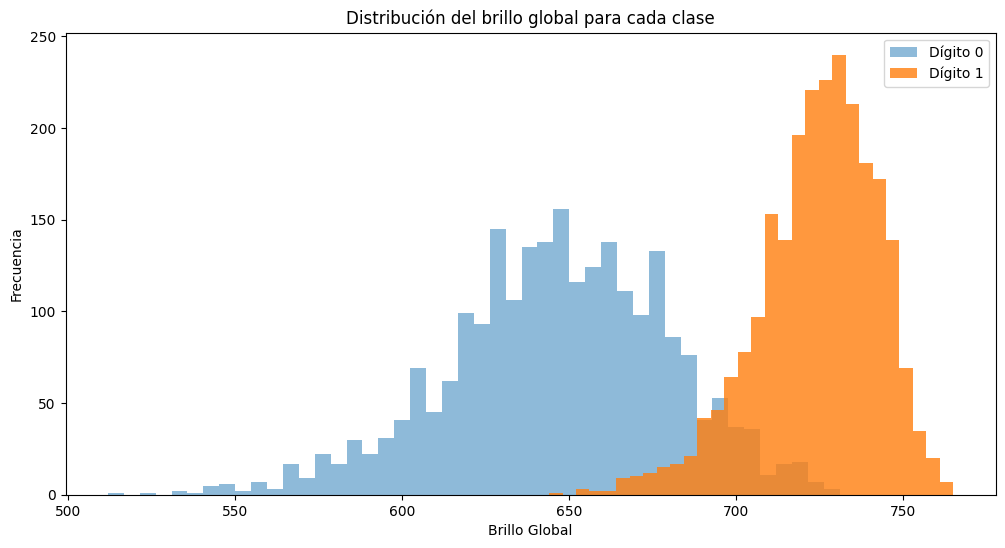

In [122]:
# Aplicamos la función 'np.apply_along_axis' a cada dígito del conjunto de datos de entrenamiento y prueba
brillo_global_train = np.apply_along_axis(calcular_brillo_global, 1, X_train.values)
brillo_global_test = np.apply_along_axis(calcular_brillo_global, 1, X_test.values)

X_train['brillo_global'] = brillo_global_train
X_test['brillo_global'] = brillo_global_test

# Grafico de la distribución del brillo global para cada clase
plt.figure(figsize=(12, 6))
plt.hist(X_train[y_train == 0]['brillo_global'], bins=46, alpha=0.5, label='Dígito 0', density = False)
plt.hist(X_train[y_train == 1]['brillo_global'], bins=30, alpha=0.8, label='Dígito 1', density = False)
plt.xlabel('Brillo Global')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right')
plt.title('Distribución del brillo global para cada clase')
plt.show()

### 5. Cálculo de la Probabilidad a Priori

Calcule la probabilidad a priori para cada clase a partir del conjunto de datos de entrenamiento. También obtenga la media y el desvío estándar de los datos (de entrenamiento) para cada clase `mean_0`, `std_0`, `mean_1` y `std_1`.

In [123]:
# Probabilidades a priori para cada clase
p_priori_0 = round(np.sum(y_train == 0) / len(y_train), 3)
p_priori_1 = round(np.sum(y_train == 1) / len(y_train), 3)

# p_priori_0 = 0.5
# p_priori_1 = 0.5

# Media y desvío estándar del brillo global para cada clase
mean_0 = round(brillo_global_train[y_train == 0].mean(), 3)
std_0 = round(brillo_global_train[y_train == 0].std(), 3)

mean_1 = round(brillo_global_train[y_train == 1].mean(), 3)
std_1 = round(brillo_global_train[y_train == 1].std(), 3)

print(f"Probabilidad a priori de la clase 0: {p_priori_0}")
print(f"Probabilidad a priori de la clase 1: {p_priori_1}")
print(f"Media del brillo global para la clase 0: {mean_0}")
print(f"Desvío estándar del brillo global para la clase 0: {std_0}")
print(f"Media del brillo global para la clase 1: {mean_1}")
print(f"Desvío estándar del brillo global para la clase 1: {std_1}")

Probabilidad a priori de la clase 0: 0.494
Probabilidad a priori de la clase 1: 0.506
Media del brillo global para la clase 0: 646.689
Desvío estándar del brillo global para la clase 0: 33.227
Media del brillo global para la clase 1: 724.108
Desvío estándar del brillo global para la clase 1: 17.806


### 6. Cálculo de la Probabilidad Condicional

Grafique los histogramas del brillo global de las 2 clases (Figura 2)

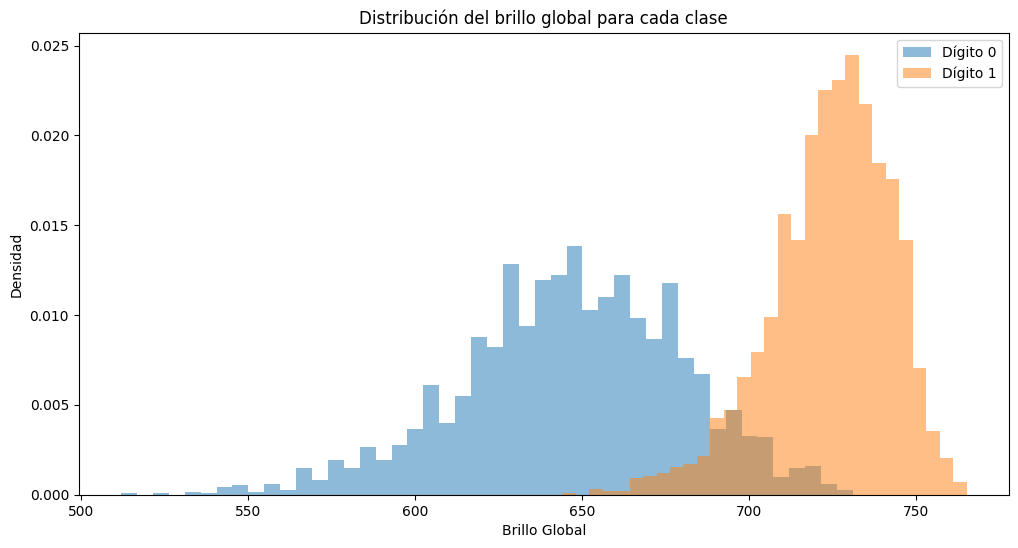

In [124]:
# Grafico del brillo global de las 2 clases
plt.figure(figsize=(12, 6))
plt.hist(brillo_global_train[y_train == 0], bins=46, alpha=0.5, label='Dígito 0', density=True)
plt.hist(brillo_global_train[y_train == 1], bins=30, alpha=0.5, label='Dígito 1', density=True)
plt.xlabel('Brillo Global')
plt.ylabel('Densidad')
plt.legend(loc='upper right')
plt.title('Distribución del brillo global para cada clase')
plt.show()

Utilice la media y desvío por clase para aproximar las distribuciones de los datos usando funciones de densidad probabilística (pdf: probability density function) gaussiana. Estas representarían las probabilidades condicionales a cada clase. Utilice para estas distribuciones la función [scipy.stats.norm.pdf](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html).

Implemente una función para calcular la probabilidad condicional de un valor o valores de brillo `X` a partir de la media `mean_d` y el desvío `std_d`correspondiente a la pdf de la clase.

Grafíque las pdf de ambas clases superpuestas junto con los histogramas (con el parámetro `density=True`) anteriores replicando la Figura 3.

In [125]:
def prob_condicional(X, mean_d, std_d):
    return norm.pdf(X, mean_d, std_d)

In [126]:
# test prob_condicional
mean_d = 723.7558
std_d = 17.744
assert math.isclose(prob_condicional(724, mean_d, std_d), 0.02248, rel_tol=1e-4)

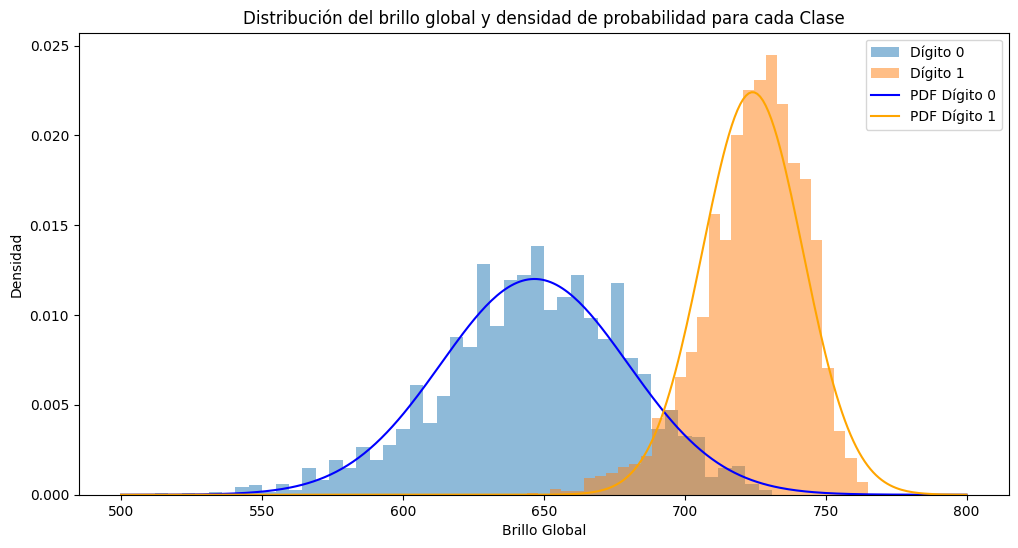

In [127]:
# Grafico de la distribución del brillo global y las funciones de densidad de probabilidad para cada clase
x_values = np.linspace(500, 800, 300)
plt.figure(figsize=(12, 6))

# Histogramas
plt.hist(brillo_global_train[y_train == 0], bins=46, alpha=0.5, label='Dígito 0', density=True)
plt.hist(brillo_global_train[y_train == 1], bins=30, alpha=0.5, label='Dígito 1', density=True)

# Funciones de densidad de probabilidad
pdf_0 = prob_condicional(x_values, mean_0, std_0)
pdf_1 = prob_condicional(x_values, mean_1, std_1)

plt.plot(x_values, pdf_0, label='PDF Dígito 0', color='blue')
plt.plot(x_values, pdf_1, label='PDF Dígito 1', color='orange')
plt.xlabel('Brillo Global')
plt.ylabel('Densidad')
plt.legend(loc='upper right')
plt.title('Distribución del brillo global y densidad de probabilidad para cada Clase')
plt.show()

Replique la gráfica izquierda de la Figura 4, Verifique el resultado del valor de brillo marcado en la gráfica (724).

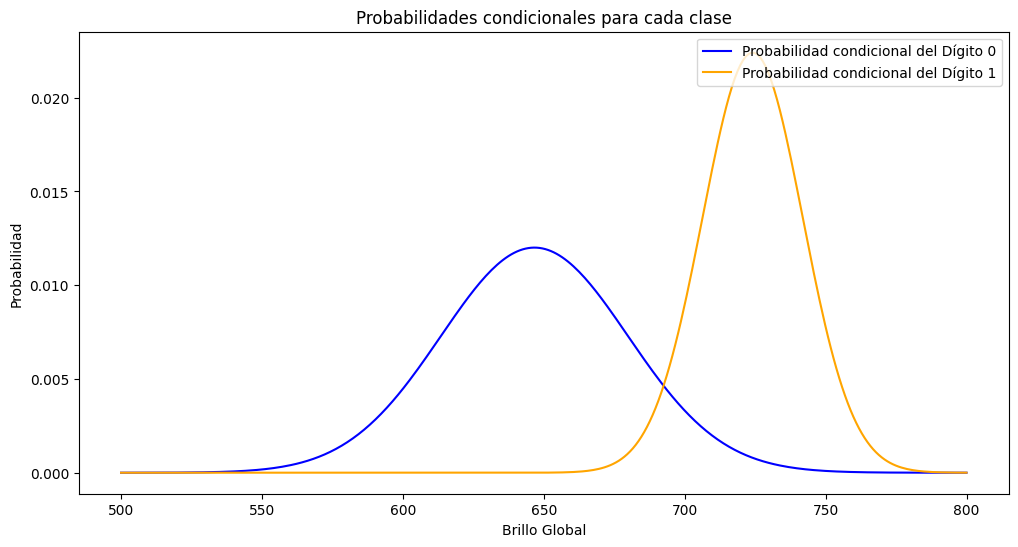

In [128]:
# Probabilidades condicionales por clase
x_values = np.linspace(500, 800, 300)

plt.figure(figsize=(12, 6))

# Probabilidades condicionales
pdf_0 = prob_condicional(x_values, mean_0, std_0)
pdf_1 = prob_condicional(x_values, mean_1, std_1)

plt.plot(x_values, pdf_0, label='Probabilidad condicional del Dígito 0', color='blue')
plt.plot(x_values, pdf_1, label='Probabilidad condicional del Dígito 1', color='orange')

plt.xlabel('Brillo Global')
plt.ylabel('Probabilidad')
plt.legend(loc='upper right')
plt.title('Probabilidades condicionales para cada clase')
plt.show()

### 7.Cálculo de la Probabilidad Conjunta

Calcule la probabilidad conjunta de cada clase usando la probabilidad a priori y la función de probabilidad condicional implementada previamente.

In [129]:
def prob_conjunta(X, priori, mean_d, std_d):
    return priori * norm.pdf(X, mean_d, std_d)

In [130]:
# test prob_conjunta
priori = 0.5
mean_d = 723.7558
std_d = 17.744
assert math.isclose(prob_conjunta(724, priori, mean_d, std_d), 0.01124, rel_tol=1e-4)

### 8. Cálculo de la Probabilidad Marginal

Calcule la probabilidad marginal a partir de la suma de las probabilidades conjuntas. Implemente una función que reciba tuplas para las probabilidades a priori, las medias y los desvíos por clase.

In [131]:
def prob_marginal(X, p_prioris, mean_ds, std_ds):
    prob_marg = 0
    for p_priori, mean_d, std_d in zip(p_prioris, mean_ds, std_ds):
        prob_marg += p_priori * norm.pdf(X, mean_d, std_d)
    return prob_marg

In [132]:
# test prob_marginal
prioris = (0.5,0.5)
mean_ds = (646.443, 723.7558)
std_ds = (33.5019, 17.744)
assert math.isclose( prob_marginal( 724, prioris, mean_ds,std_ds), 0.011648, rel_tol=1e-4)

Grafique las probabilidades conjuntas por clase superpuestas con la probabilidad marginal replicando la gráfica derecha de la Figura4. Verifique los resultados del valor de brillo marcado en la gráfica.

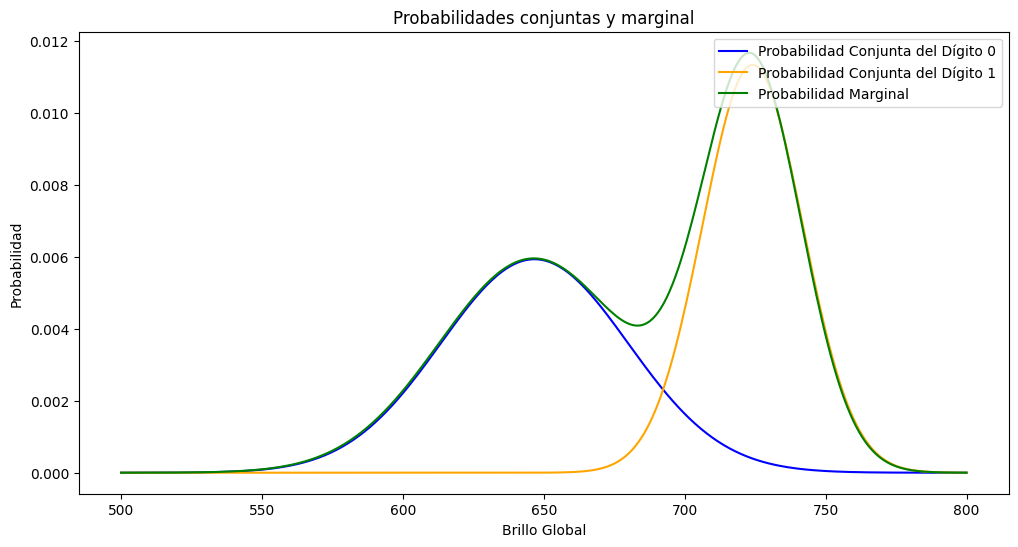

In [133]:
# Probabilidades conjuntas por clase superpuestas con la probabilidad marginal
x_values = np.linspace(500, 800, 300)

plt.figure(figsize=(12, 6))

# Probabilidades conjuntas
joint_prob_0 = prob_conjunta(x_values, p_priori_0, mean_0, std_0)
joint_prob_1 = prob_conjunta(x_values, p_priori_1, mean_1, std_1)

# Probabilidad marginal
marginal_prob = prob_marginal(x_values, prioris, mean_ds, std_ds)

plt.plot(x_values, joint_prob_0, label='Probabilidad Conjunta del Dígito 0', color='blue')
plt.plot(x_values, joint_prob_1, label='Probabilidad Conjunta del Dígito 1', color='orange')
plt.plot(x_values, marginal_prob, label='Probabilidad Marginal', color='green')

plt.xlabel('Brillo Global')
plt.ylabel('Probabilidad')
plt.legend(loc='upper right')
plt.title('Probabilidades conjuntas y marginal')
plt.show()

### 9. Cálculo de la Probabilidad a Posteriori

Calcule las probabilidades a posteriori para cada clase usando la regla de Bayes. Implemente la función correspondiente y replique la Figura5.

Si X es un arreglo de N datos, la función `prob_posteriori` debe devolver una matriz de Nx2, siendo los valores en cada fila, las probabilidades de pertenencia a las clases para cada dato.

In [134]:
def prob_posteriori(X, p_prioris, mean_ds, std_ds):
    prob_marg = prob_marginal(X, p_prioris, mean_ds, std_ds)
    posteriors = []
    for p_priori, mean_d, std_d in zip(p_prioris, mean_ds, std_ds):
        joint_prob = prob_conjunta(X, p_priori, mean_d, std_d)
        posteriors.append(round(joint_prob / prob_marg, 3))
    return np.array(posteriors)

In [135]:
# test prob_posteriori
prioris = (0.5,0.5)
mean_ds = (646.443, 723.7558)
std_ds = (33.5019, 17.744)
prob_posteriori(724, prioris, mean_ds, std_ds)
# X = 724 tiene mayor probabilidad de pertenecer a la clase 1
assert np.allclose(prob_posteriori(724, prioris, mean_ds, std_ds), np.array([0.035, 0.965]))

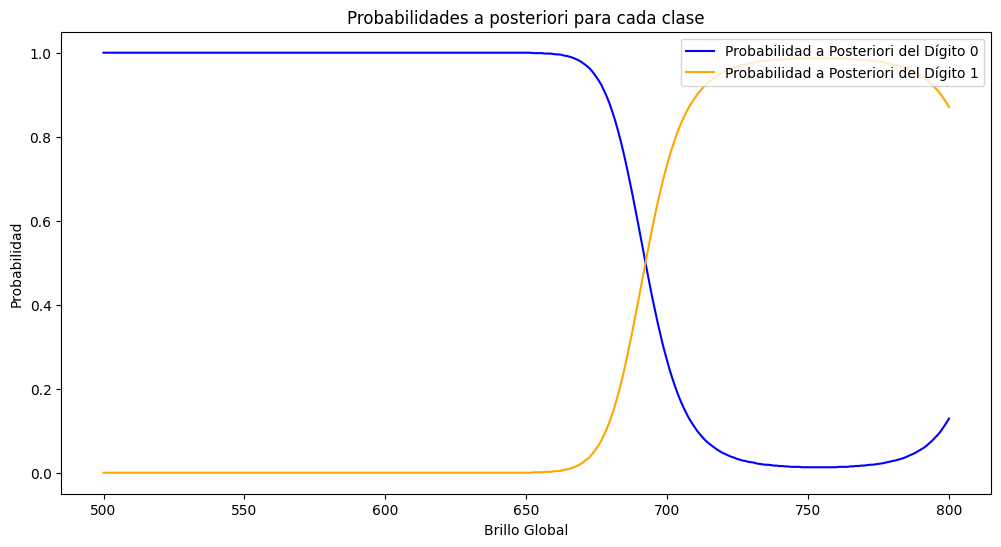

In [136]:
# Probabilidades a posteriori, usando la función prob_posteriori
posterior_prob = np.array([prob_posteriori(x, prioris, mean_ds, std_ds) for x in x_values])

# Grafico de las probabilidades a posteriori para cada clase
plt.figure(figsize=(12, 6))

plt.plot(x_values, posterior_prob[:, 0], label='Probabilidad a Posteriori del Dígito 0', color='blue')
plt.plot(x_values, posterior_prob[:, 1], label='Probabilidad a Posteriori del Dígito 1', color='orange')

plt.xlabel('Brillo Global')
plt.ylabel('Probabilidad')
plt.legend(loc='upper right')
plt.title('Probabilidades a posteriori para cada clase')
plt.show()

Con las probabilidades a posteriori calculadas, Obtenga las predicciones con los datos de prueba y compárelas con sus etiquetas. Utilice [np.argmax](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html)

Qué desempeño en tasa de aciertos obtiene?

In [137]:
# Predecimos con los datos de prueba
predicciones = np.argmax([prob_posteriori(x, prioris, mean_ds, std_ds) for x in brillo_global_test], axis=1)

# Comparamos las predicciones obtenidas con las etiquetas reales
tasa_aciertos = round(np.mean(predicciones == y_test), 4)
print(f"Tasa de aciertos: {tasa_aciertos*100}%")

Tasa de aciertos: 93.17%


### 10. Scikit Learn
Compare el desempeño obtenido usando la clase [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB)

In [138]:
from sklearn.naive_bayes import GaussianNB

# Inicializamos el clasificador Naive Bayes
bayes = GaussianNB()

# Entrenamos el clasificador con el conjunto de entrenamiento
bayes.fit(X_train[['brillo_global']], y_train)

# Realizamos las predicciones
y_pred = bayes.predict(X_test[['brillo_global']])
y_pred_proba = bayes.predict_proba(X_test[['brillo_global']])
y_pred_proba[:5]

# Comparamos las predicciones obtenidas con las etiquetas reales
precision = round(bayes.score(X_test[['brillo_global']], y_test), 4)
print(f"Precisión del clasificador: {precision*100}%")

Precisión del clasificador: 93.17%
